**Name** : Neha Gode
**UID** : 2021300039
**Class** : BE COMPS
# Dataset
You can view the dataset from this link: [Life Expectancy and Socio-economic World Bank](https://www.kaggle.com/datasets/mjshri23/life-expectancy-and-socio-economic-world-bank)
# Description
This dataset provides a snapshot of various health and socio-economic indicators for countries around the world in 2001.  It includes key metrics such as life expectancy, prevalence of undernourishment, CO2 emissions, health expenditure, education expenditure, unemployment rate, corruption perception, sanitation access, and mortality rates from injuries, communicable diseases, and non-communicable diseases. This data allows for analysis of relationships between these factors and comparisons across different regions and income groups.
# Metadata
| Column Name | Description | Data Type |
|---|---|---|
| Country Name | Name of the country | Text |
| Country Code | 3-letter ISO country code | Text |
| Region | Geographic region the country belongs to | Categorical |
| IncomeGroup | World Bank income group classification | Categorical | 
| Year | Year of the data | Numeric |
| Life Expectancy World Bank | Life expectancy at birth (in years) | Numeric |
| Prevelance of Undernourishment | Prevalence of undernourishment (% of population) | Numeric |
| CO2 | CO2 emissions (kt) | Numeric |
| Health Expenditure % | Current health expenditure (% of GDP) | Numeric |
| Education Expenditure % | Public expenditure on education, total (% of GDP) | Numeric |
| Unemployment | Unemployment, total (% of total labor force) | Numeric |
| Corruption | Corruption Perceptions Index (score) | Numeric |
| Sanitation | People using at least basic sanitation services (% of population) | Numeric | 
| Injuries | Number of deaths attributed to injuries | Numeric |
| Communicable | Number of deaths attributed to communicable diseases | Numeric |
| NonCommunicable | Number of deaths attributed to non-communicable diseases | Numeric |


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go


In [75]:
df = pd.read_csv("life expectancy.csv")
df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


# WORDCHART

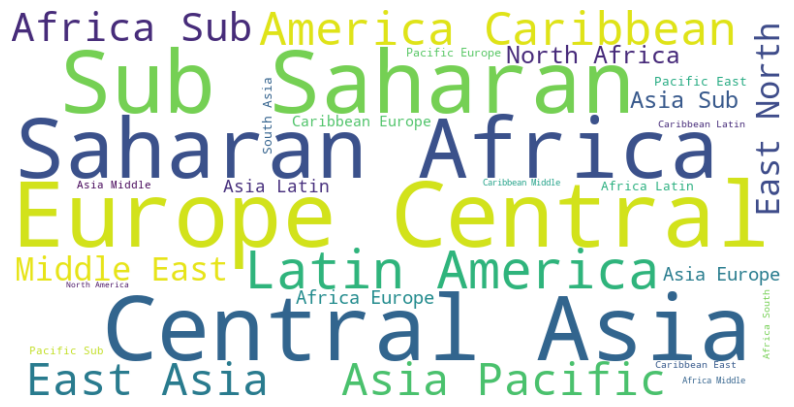

In [76]:
# Word Chart (Wordcloud) for Regions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Region']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Regional Representation

The word cloud highlights the distribution of regions within the dataset. "Central Asia," "Africa," and "Sub-Saharan Africa" are the most prominent terms, indicating a significant focus on these regions in the analyzed data. This suggests that the dataset may be skewed towards these areas and might not fully represent global trends.

# BOX AND WHISHKER PLOT

In [77]:
# Box and Whisker Plot for Life Expectancy by Region
fig = px.box(df, x='Region', y='Life Expectancy World Bank', title='Life Expectancy by Region')
fig.show()

## Life Expectancy Disparities

The boxplot illustrates disparities in life expectancy across different regions. North America boasts the highest median life expectancy, while Sub-Saharan Africa lags significantly behind. This visual emphasizes the considerable variation in health outcomes and access to healthcare between regions. The wide range observed in the Middle East & North Africa suggests uneven development and potential internal disparities within that region.

# VIOLIN PLOT

In [78]:
# Violin Plot for Unemployment by Region
fig = px.violin(df, x='Region', y='Unemployment', box=True, points='all', 
                title='Unemployment Rate by Region')
fig.show()


## Unemployment Variation and Outliers

The violin plot provides insights into the distribution of unemployment rates. Sub-Saharan Africa not only has the highest unemployment but also exhibits the greatest variability, implying diverse economic challenges within the region.  Interestingly, the multimodal distributions seen in several regions, including Europe & Central Asia and Latin America & Caribbean, indicate the presence of distinct sub-groups experiencing different levels of unemployment. This might be attributed to factors like economic sectors, education levels, or demographics within each region. 


# LINEAR REGRESSION

In [79]:
# Linear Regression Plot for Life Expectancy vs. Prevalence of Undernourishment
fig = px.scatter(df, x='Prevelance of Undernourishment', y='Life Expectancy World Bank', 
                 trendline='ols', title='Life Expectancy vs. Prevalence of Undernourishment')
fig.show()


## Undernourishment and Life Expectancy: A Negative Correlation

The scatter plot clearly demonstrates a negative correlation between the prevalence of undernourishment and life expectancy. As undernourishment increases, life expectancy tends to decrease. This highlights the crucial role of adequate nutrition in overall health and longevity. The trend line further emphasizes this relationship, providing a visual representation of the association.

# 3D SCATTER PLOT

In [80]:
# 3D Scatter Plot for CO2 Emissions, Life Expectancy, and Prevalence of Undernourishment with Fixed Size Spheres
fig = px.scatter_3d(df, 
                    x='CO2', 
                    y='Life Expectancy World Bank', 
                    z='Prevelance of Undernourishment', 
                    color='Region', 
                    title='CO2 Emissions vs. Life Expectancy vs. Prevalence of Undernourishment with Fixed Size Spheres')

# Fixing the size of the spheres
fig.update_traces(marker=dict(size=6))  # Set all spheres to a fixed size (e.g., 6)

fig.show()


##  3D Scatter Plot: CO2 Emissions, Life Expectancy, and Undernourishment

This 3D scatter plot adds another layer to the analysis by incorporating CO2 emissions.  It reveals distinct clusters based on regions.  For instance, North America displays high life expectancy and CO2 emissions with low undernourishment, while regions like South Asia and Sub-Saharan Africa exhibit higher undernourishment rates and lower life expectancy despite lower CO2 emissions. This visualization highlights the complex interplay between environmental factors, socio-economic development, and health outcomes.

# JITTER PLOT

In [81]:
df['CO2_bin'] = pd.cut(df['CO2'], bins=[0, 1000, 10000, 100000, float('inf')],
                         labels=['0-1k', '1k-10k', '10k-100k', '100k+'])

# Create the strip plot
fig = px.strip(df, 
               x='IncomeGroup', 
               y='Life Expectancy World Bank',
               color='CO2_bin',
               hover_name='Country Name',
               hover_data=['Region', 'Year', 'CO2'],
               labels={'IncomeGroup': 'Income Group',
                       'Life Expectancy World Bank': 'Life Expectancy (years)',
                       'CO2_bin': 'CO2 Emissions'},
               title='Life Expectancy by Income Group and CO2 Emissions (2001)',
               height=600,
               width=900)

# Update the layout
fig.update_layout(
    xaxis_title="Income Group",
    yaxis_title="Life Expectancy (years)",
    legend_title="CO2 Emissions",
    font=dict(size=12)
)

# Update marker size and add jitter
fig.update_traces(marker=dict(size=10, 
                             ),
                  jitter=0.3)  # Add some jitter for better visibility

# Show the plot
fig.show()

## Income, CO2 Emissions, and Life Expectancy

This stripplot explores the relationship between life expectancy, income groups, and CO2 emissions. While higher income groups generally show higher life expectancy, there is considerable variation within each group based on CO2 emission levels. This suggests that while income plays a role, environmental factors like CO2 emissions can significantly influence life expectancy within those income brackets.  The overlapping data points indicate that other factors beyond income and CO2 emissions contribute to life expectancy variations.


# LINE PLOT

In [82]:
average_life_expectancy = df.groupby('Year')['Life Expectancy World Bank'].mean().reset_index()

# Plot the average life expectancy over time
fig = px.line(average_life_expectancy, 
              x='Year', 
              y='Life Expectancy World Bank', 
              title='Average Life Expectancy Over Time')

fig.show()

## Increasing Life Expectancy Over Time

The line graph depicts a clear upward trend in average life expectancy globally from 2002 to 2019. This suggests improvements in healthcare, sanitation, and overall living conditions worldwide. The consistent rise indicates a positive trajectory in global health and development efforts.

# AREA PLOT

In [83]:
# Area Plot for CO2 Emissions by Country
fig = px.area(df, x='Country Name', y='CO2', title='CO2 Emissions by Country')
fig.show()

##  CO2 Emissions Vary Significantly Across Countries

This bar chart reveals the wide range of CO2 emissions across different countries. While some countries have relatively low emissions, others show significantly higher levels, contributing more substantially to global greenhouse gas emissions. This visualization emphasizes the unequal distribution of environmental impact and highlights the need for targeted efforts to address CO2 emissions in high-emitting countries.

# WATERFALL

In [84]:
# Aggregate average health expenditure % by income group
health_expenditure_by_income_group = df.groupby('IncomeGroup')['Health Expenditure %'].mean().reset_index()

# Create waterfall chart
fig = go.Figure()

# Add the initial value
fig.add_trace(go.Waterfall(
    x=health_expenditure_by_income_group['IncomeGroup'],
    y=health_expenditure_by_income_group['Health Expenditure %'],
    base=health_expenditure_by_income_group['Health Expenditure %'].iloc[0],
    name='Health Expenditure % Change by Income Group'
))

fig.update_layout(
    title='Change in Health Expenditure % by Income Group',
    xaxis_title='Income Group',
    yaxis_title='Average Health Expenditure %'
)

fig.show()


## Health Expenditure Increases with Income Level

The waterfall chart effectively illustrates the relationship between income group and average health expenditure. As income levels rise, so does the percentage of GDP allocated to health. Lower-middle-income countries show the most substantial increase in health expenditure. This pattern highlights the link between economic development and investment in healthcare. 

# DONUT CHART

In [85]:
# Donut Plot for Regions
region_counts = df['Region'].value_counts()
fig = px.pie(df, names='Region', hole=0.3, title='Distribution of Regions (Donut Plot)')
fig.show()


## Regional Representation: A Balanced Dataset

The donut plot provides a clear picture of the distribution of regions within the dataset.  Europe & Central Asia and Sub-Saharan Africa have the highest representation, followed closely by Latin America & Caribbean. While no single region dominates, the dataset appears to be relatively balanced, allowing for meaningful comparisons across different geographic areas.

In [86]:
# Treemap for Regions
fig = px.treemap(df, path=['Region'], values='CO2', title='Treemap of CO2 by Region')
fig.show()


## CO2 Emissions: East Asia & Pacific Dominates

The treemap visually emphasizes the relative contribution of each region to overall CO2 emissions.  East Asia & Pacific stands out as the largest contributor, occupying a significant portion of the map. This highlights the region's substantial industrial activity and energy consumption. North America also represents a considerable share, indicating its high per capita emissions.


In [87]:
# Aggregate average CO2 emissions by region
co2_by_region = df.groupby('Region')['CO2'].mean().sort_values(ascending=False).reset_index()

# Create funnel chart
fig = go.Figure()

fig.add_trace(go.Funnel(
    y=co2_by_region['Region'],
    x=co2_by_region['CO2'],
))

fig.update_layout(
    title='CO2 Emissions Funnel by Region'
)

fig.show()


##  CO2 Emission Funnel: A Hierarchy of Emissions

The funnel chart effectively ranks regions by their CO2 emissions, starting with the highest emitter, North America, at the top. The chart clearly demonstrates the decreasing order of emissions, with Sub-Saharan Africa having the lowest contribution. This visualization underscores the disparities in CO2 emissions between regions and provides a concise summary of their relative environmental impact.
